<a href="https://colab.research.google.com/github/invinc2005/eda-22bds0441/blob/main/22BDS0441.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Santosh Acharya
## Reg.no. - 22BDS0441

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/melb_data.csv"
df = pd.read_csv(url)

# DataSet Dimensions and Summary Statistics

In [ ]:
print("Dataset Dimensions:", df.shape)

Dataset Dimensions: (13580, 21)


In [ ]:
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
           Suburb        Address         Rooms   Type         Price Method  \
count       13580          13580  13580.000000  13580  1.358000e+04  13580   
unique        314          13378           NaN      3           NaN      5   
top     Reservoir  5 Margaret St           NaN      h           NaN      S   
freq          359              3           NaN   9449           NaN   9022   
mean          NaN            NaN      2.937997    NaN  1.075684e+06    NaN   
std           NaN            NaN      0.955748    NaN  6.393107e+05    NaN   
min           NaN            NaN      1.000000    NaN  8.500000e+04    NaN   
25%           NaN            NaN      2.000000    NaN  6.500000e+05    NaN   
50%           NaN            NaN      3.000000    NaN  9.030000e+05    NaN   
75%           NaN            NaN      3.000000    NaN  1.330000e+06    NaN   
max           NaN            NaN     10.000000    NaN  9.000000e+06    NaN   

       SellerG        Date      Distance  

In [ ]:
print("\nDataSet Info:")
print(df.info())


DataSet Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  floa

In [ ]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


# Data Handling

In [ ]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
if 'CouncilArea' in df.columns:
    df['CouncilArea'] = df['CouncilArea'].replace({'None': np.nan})

In [ ]:
df.rename(columns={'Rooms': 'NumRooms'}, inplace=True)

# Data Cleaning

In [ ]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows found: {duplicates}")
df.drop_duplicates(inplace=True)
print(f"\nRows left after removing duplicate rows: {df.shape[0]}")


Duplicate rows found: 8

Rows left after removing duplicate rows: 13572


In [ ]:
if 'YearBuilt' in df.columns:
    df['YearBuilt'] = df['YearBuilt'].apply(lambda x: np.nan if x < 1800 else x)

In [ ]:
missing_counts = df.isnull().sum()
print("\nMissing values before cleaning:\n", missing_counts[missing_counts > 0])


Missing values before cleaning:
 Date            8434
Car               62
BuildingArea    6447
YearBuilt       5373
CouncilArea     1369
dtype: int64


In [ ]:
threshold = df.shape[1] / 2
df.dropna(thresh=threshold, inplace=True)

In [ ]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
if 'Landsize' in df.columns:
    df = df[df['Landsize'] < df['Landsize'].quantile(0.99)]
if 'BuildingArea' in df.columns:
    df = df[df['BuildingArea'] < df['BuildingArea'].quantile(0.99)]

In [ ]:
print("\nData cleaned. New Dimensions:", df.shape)
print("\nMissing values after cleaning:\n", df.isnull().sum().sum())


Data cleaned. New Dimensions: (13301, 21)

Missing values after cleaning:
 0


# Univariate Analysis

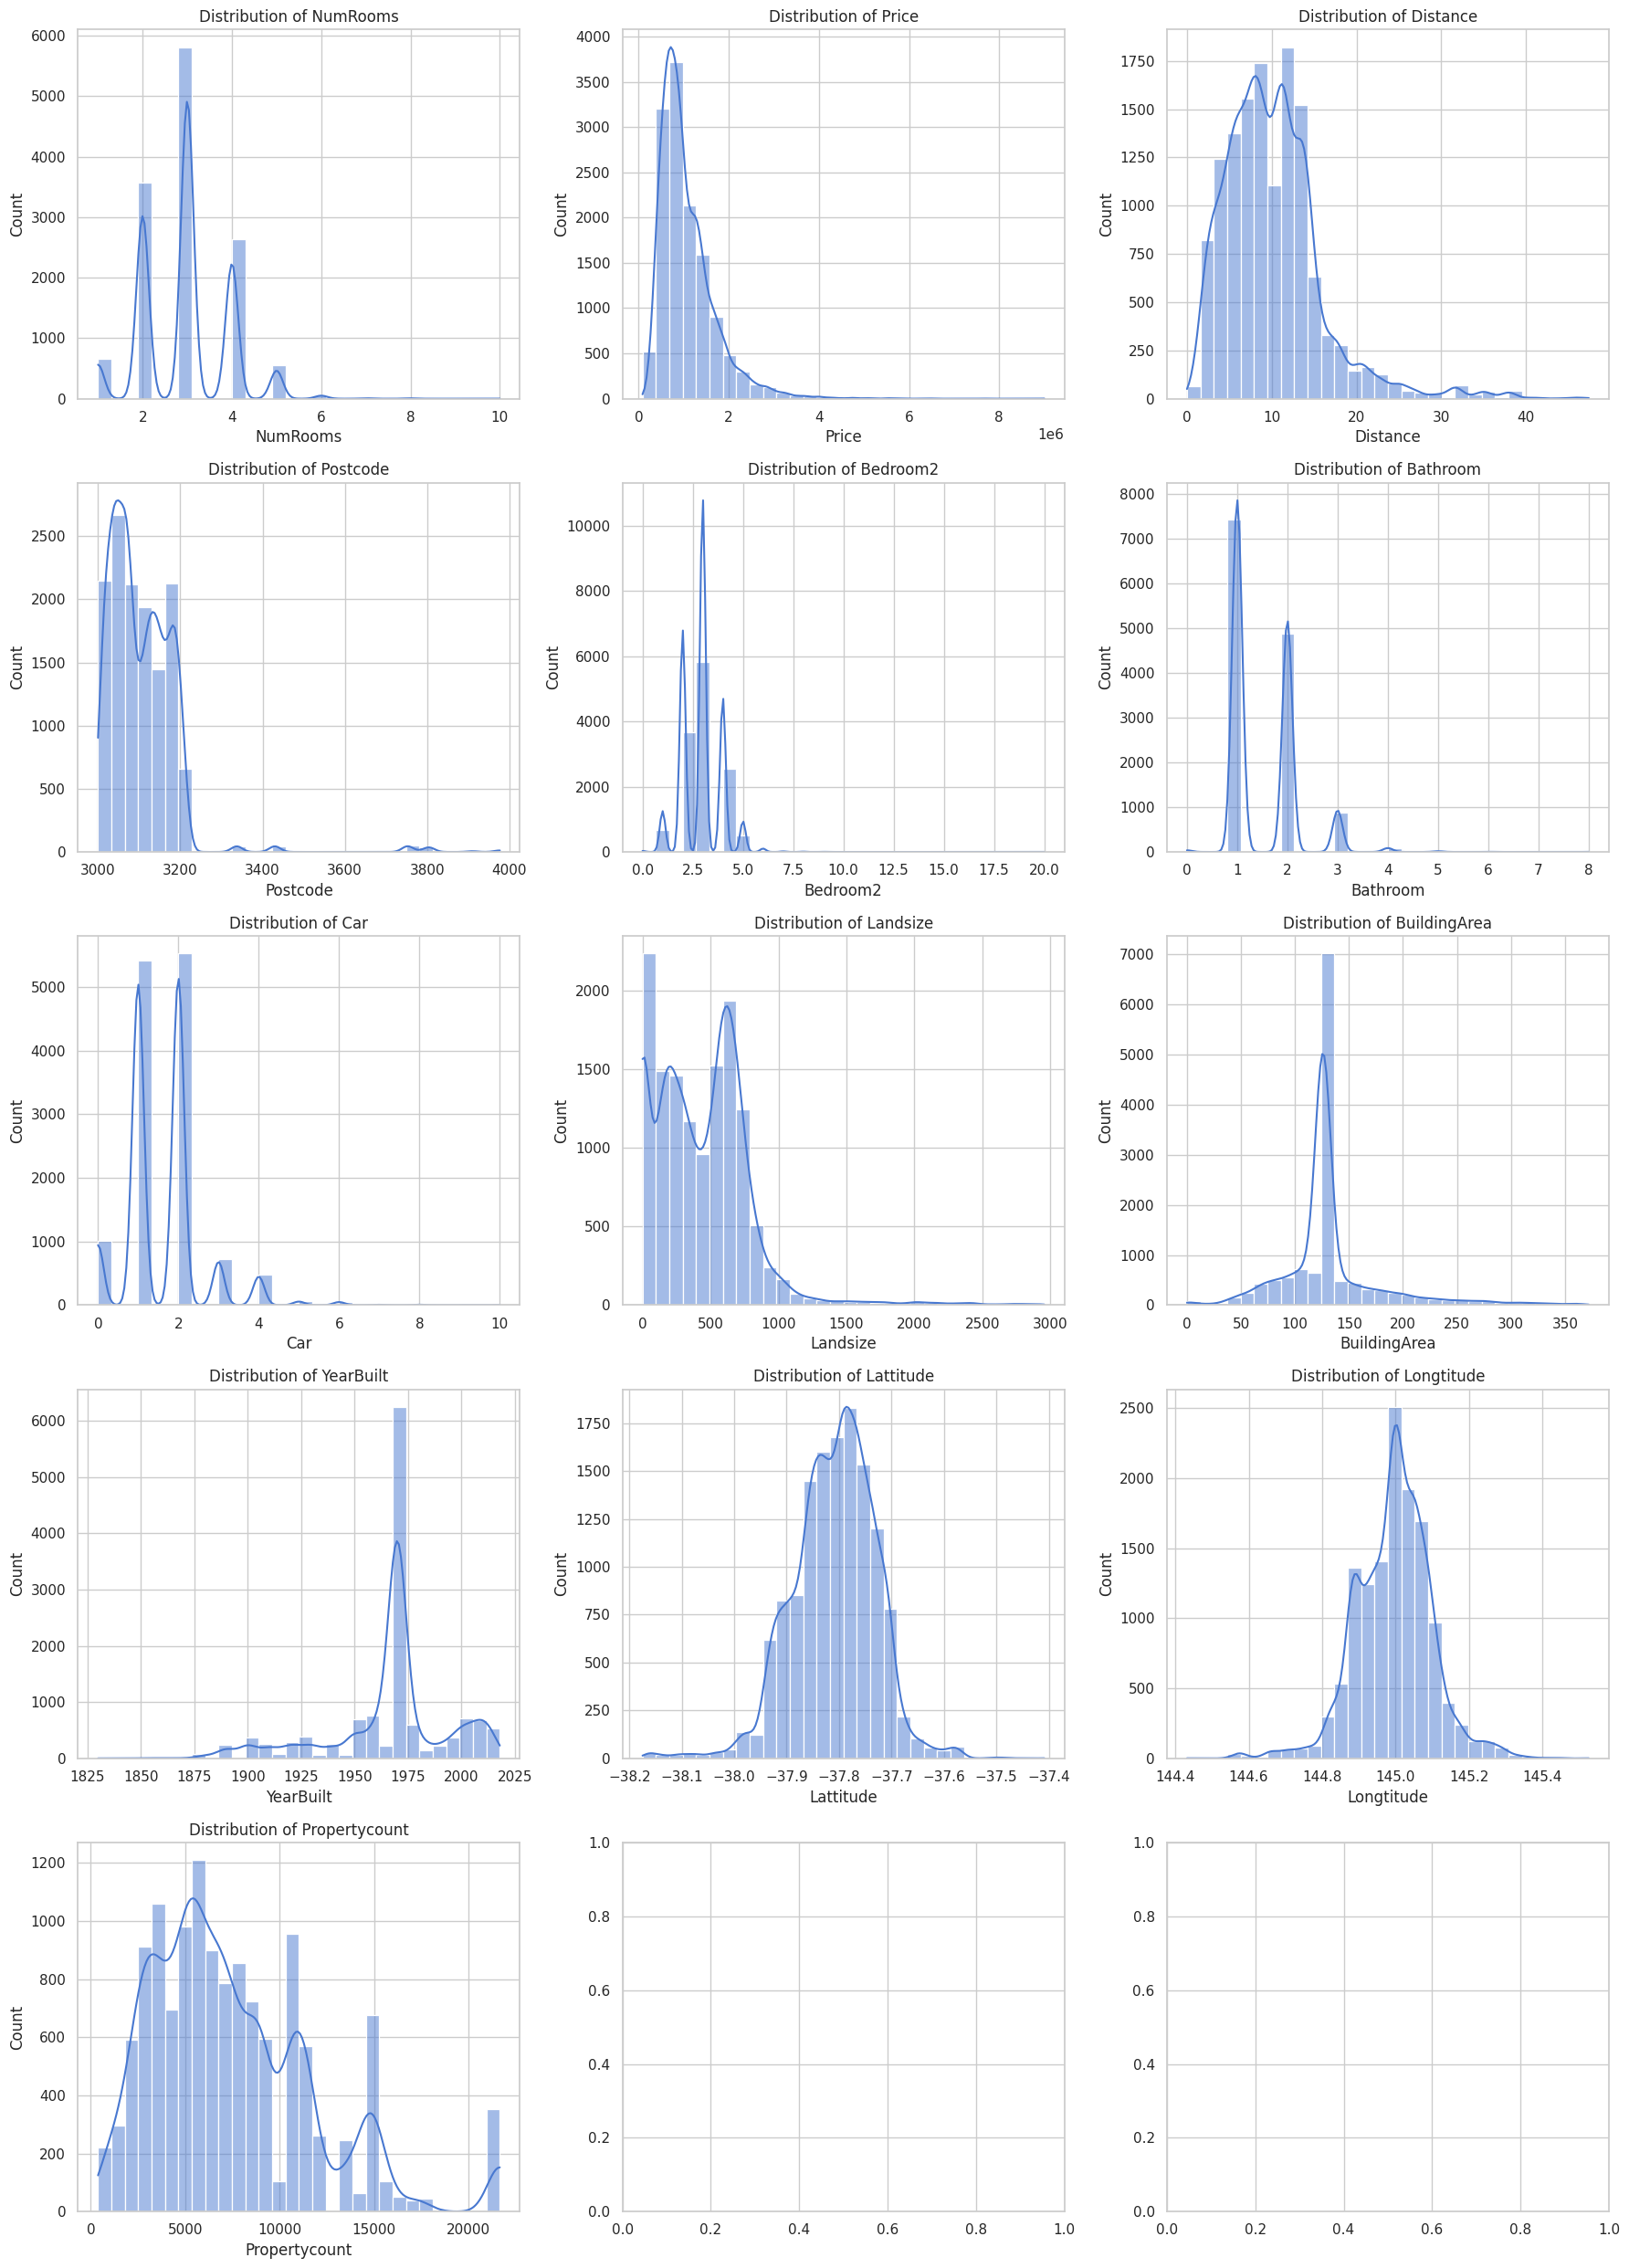

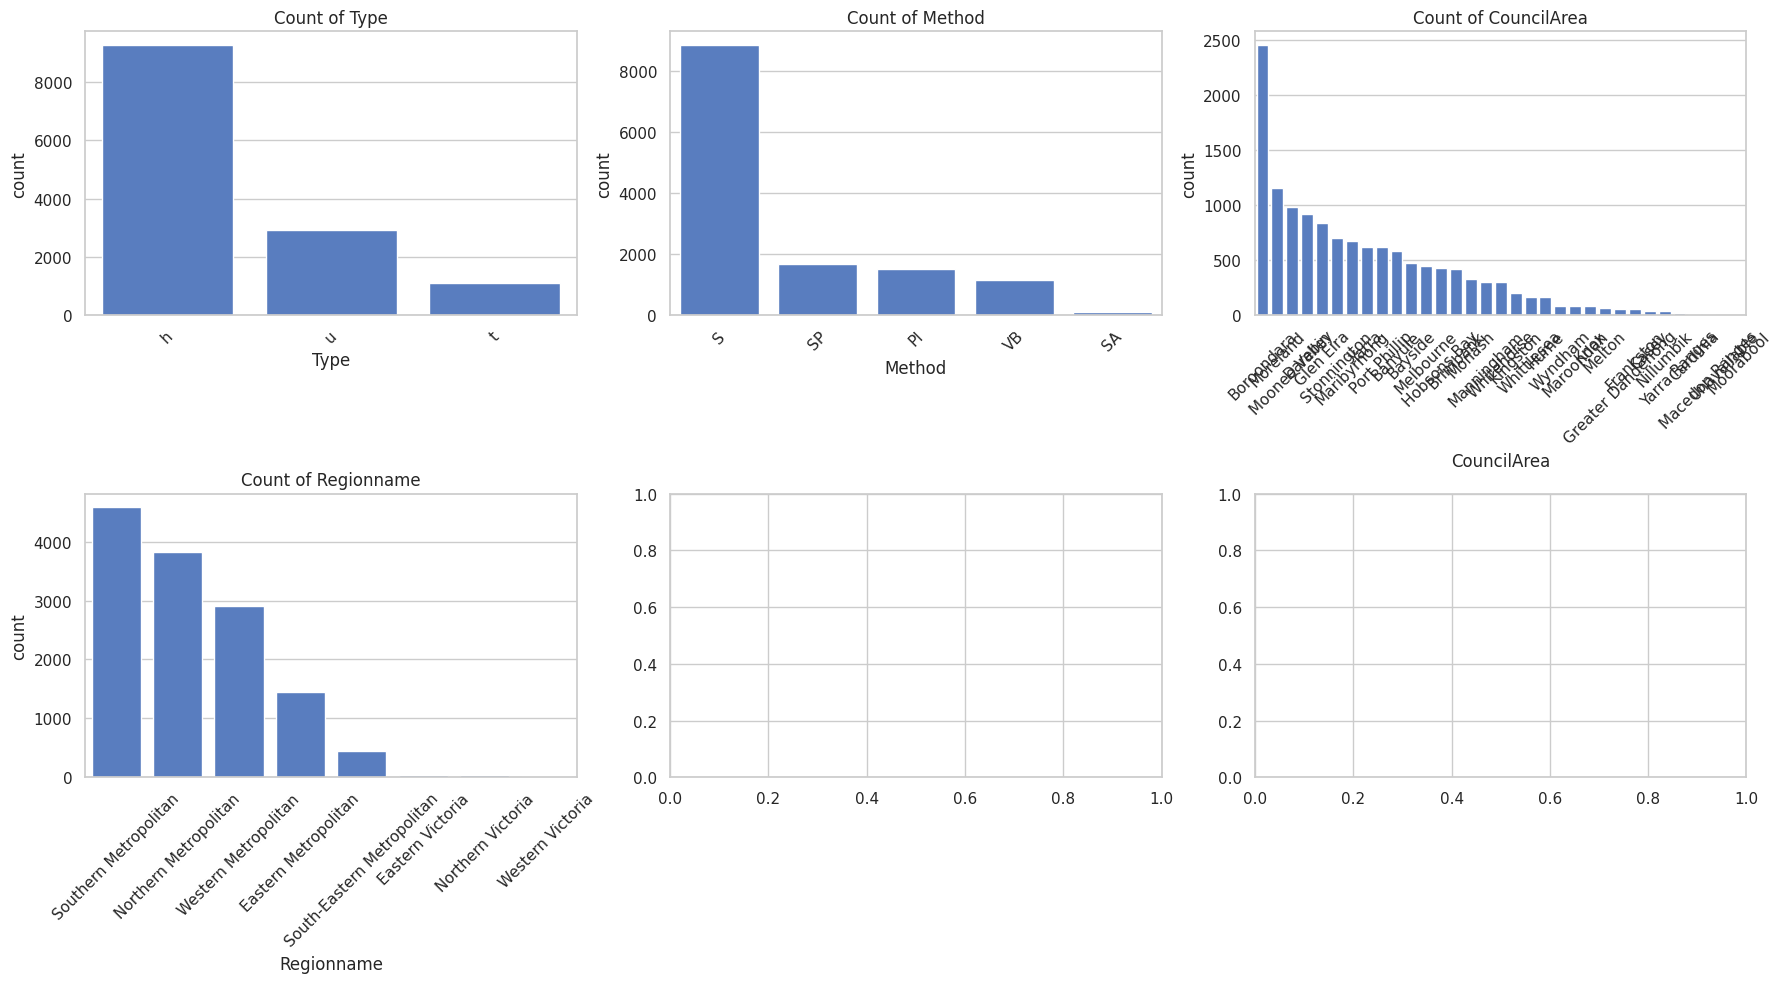

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(style="whitegrid", palette="muted")

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
n_num = len(num_cols)
rows_num = math.ceil(n_num / 3)

fig, axes = plt.subplots(rows_num, 3, figsize=(18, 5*rows_num))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")


plt.tight_layout()
plt.show()
columns_to_exclude = ['SellerG', 'Suburb','Address']
cat_cols = df.drop(columns=columns_to_exclude).select_dtypes(include=['object']).columns
n_cat = len(cat_cols)
rows_cat = math.ceil(n_cat / 3)

fig, axes = plt.subplots(rows_cat, 3, figsize=(18, 5*rows_cat))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

# Bivariate Analysis

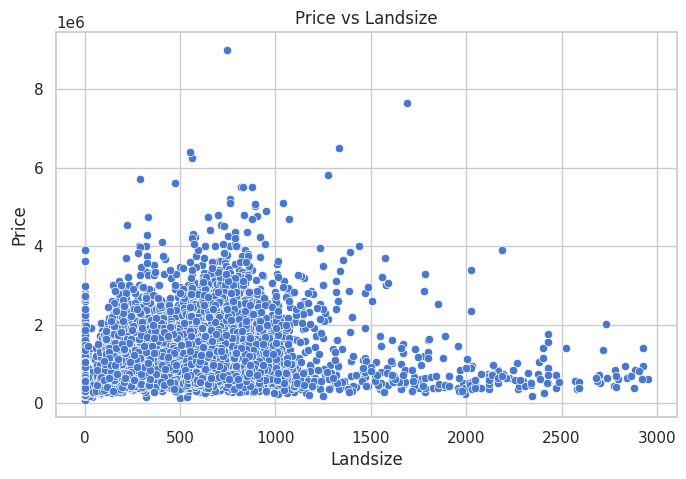

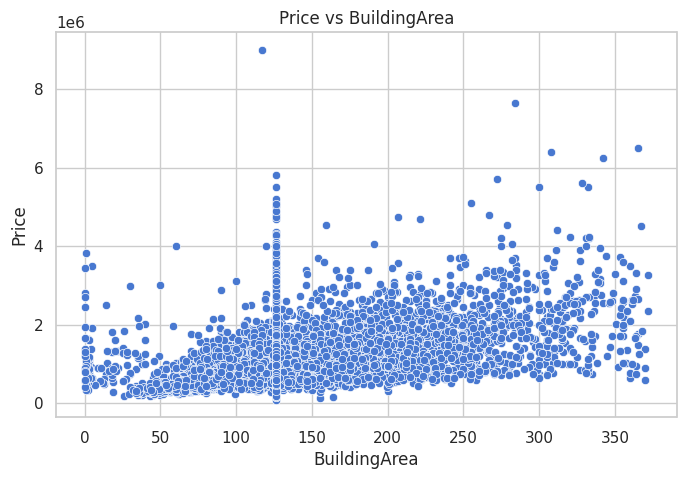

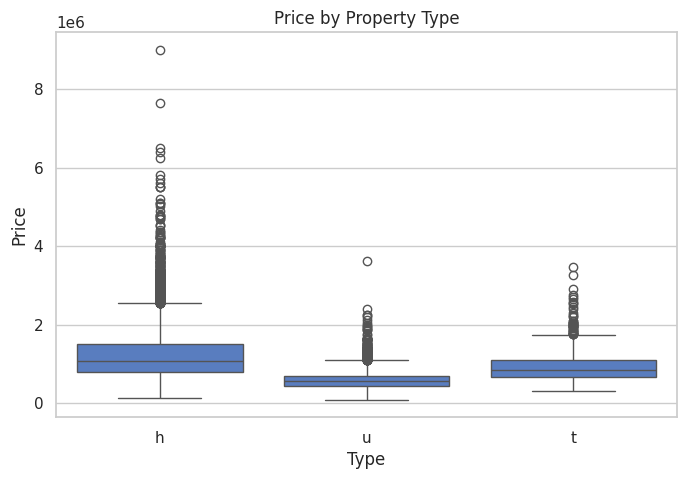

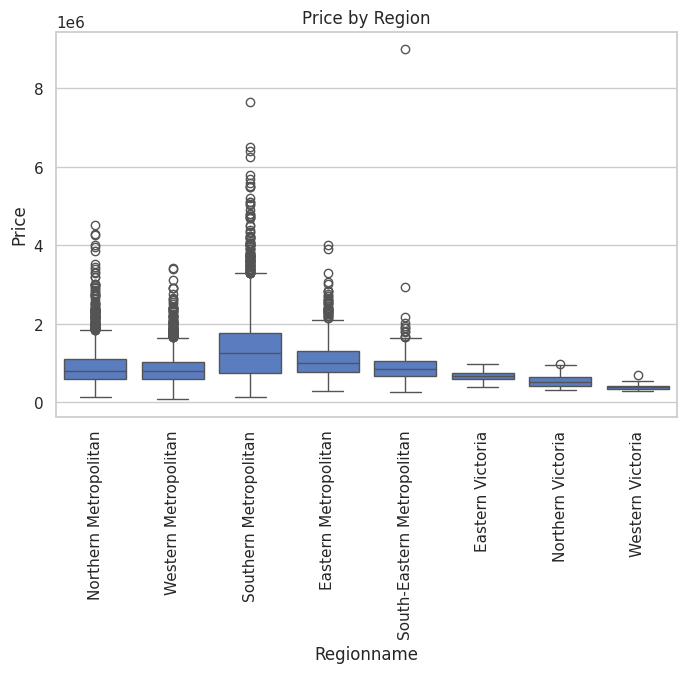

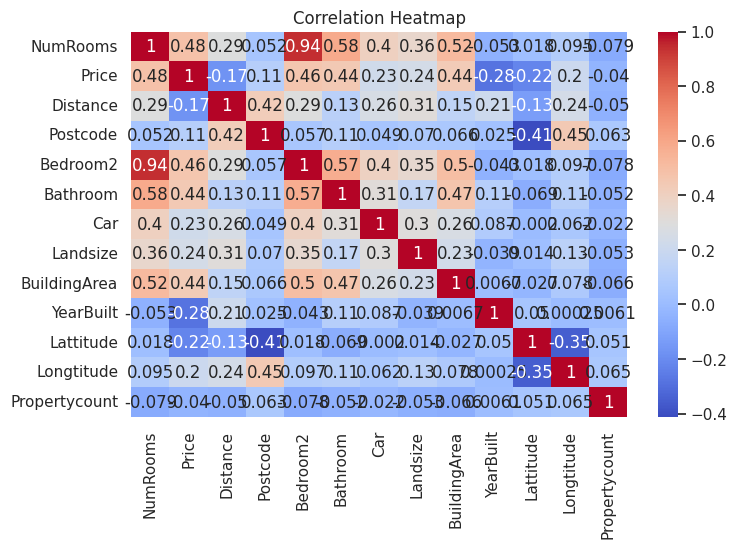

In [26]:
sns.scatterplot(x='Landsize', y='Price', data=df)
plt.title("Price vs Landsize")
plt.show()

sns.scatterplot(x='BuildingArea', y='Price', data=df)
plt.title("Price vs BuildingArea")
plt.show()

sns.boxplot(x='Type', y='Price', data=df)
plt.title("Price by Property Type")
plt.show()

sns.boxplot(x='Regionname', y='Price', data=df)
plt.xticks(rotation=90)
plt.title("Price by Region")
plt.show()

corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Multivariate Analysis

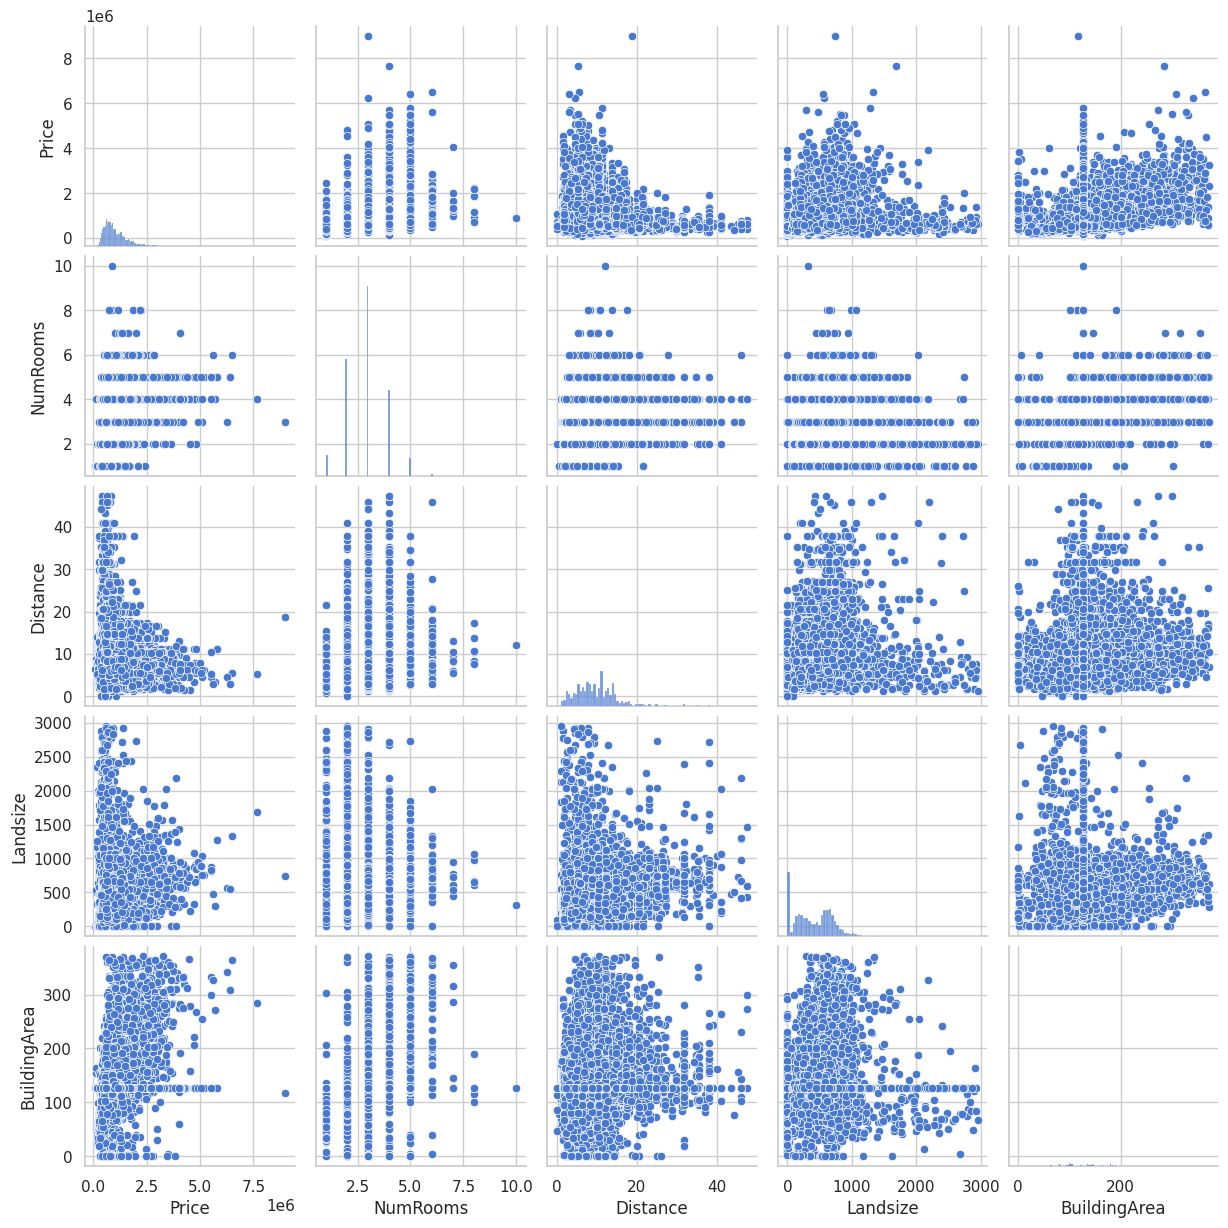

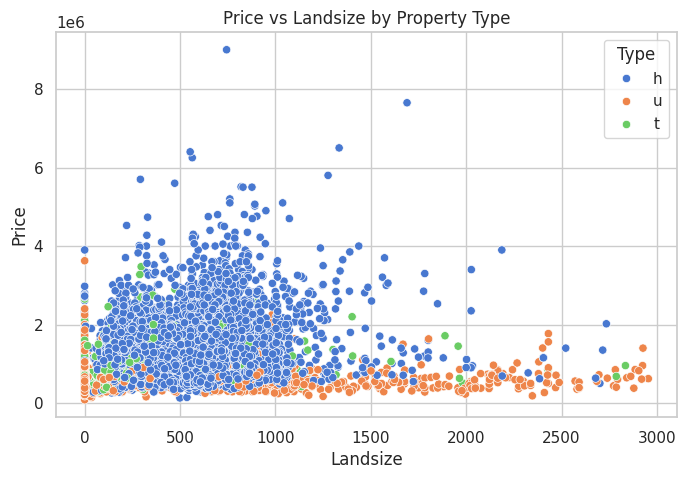

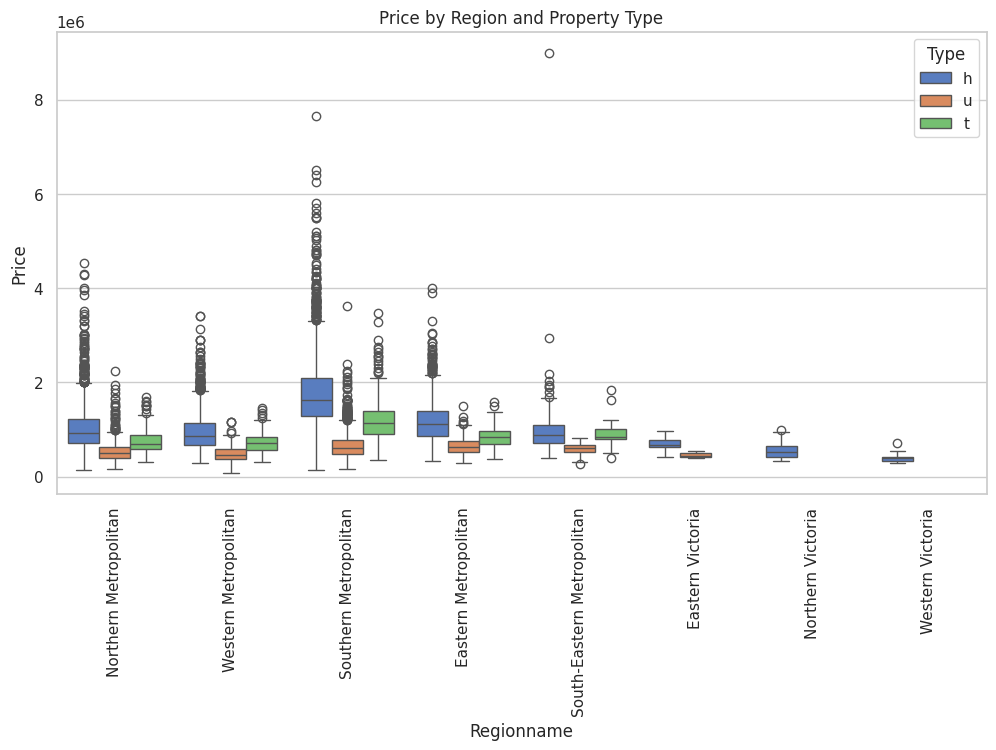

In [29]:
sns.pairplot(df[['Price', 'NumRooms', 'Distance', 'Landsize', 'BuildingArea']])
plt.show()

sns.scatterplot(x='Landsize', y='Price', hue='Type', data=df)
plt.title("Price vs Landsize by Property Type")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Regionname', y='Price', hue='Type', data=df)
plt.xticks(rotation=90)
plt.title("Price by Region and Property Type")
plt.show()
